In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/reliance/RELIANCE.NS.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,1120.330444,1123.203125,1105.718872,1110.721436,1089.801147,7291282
1,2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
2,2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697
3,2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
4,2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.set_index('Date',inplace=True)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1120.330444,1123.203125,1105.718872,1110.721436,1089.801147,7291282
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382


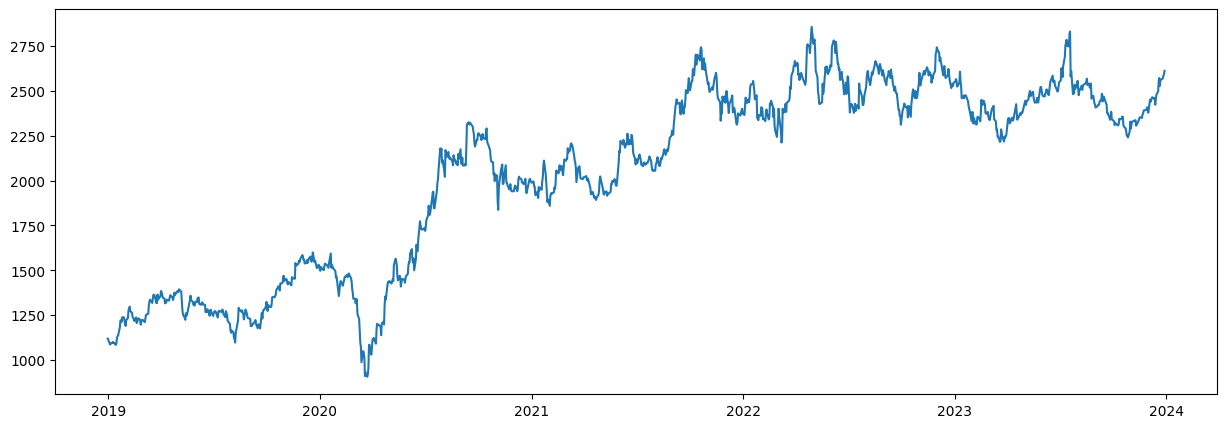

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df['Open'])


In [9]:
df.drop('Adj Close',axis=1,inplace=True)

In [10]:
df[df.isnull().any(axis=1)]

,Open,High,Low,Close,Volume
Date,,,,,


In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,2044.708012,2066.139210,2021.617186,2042.905293,9.636555e+06
std,503.996696,506.486992,501.333213,504.016551,7.428361e+06
min,907.596863,941.079529,867.427673,875.748779,0.000000e+00
25%,1525.884857,1534.863556,1507.671234,1520.750153,5.237369e+06
50%,2202.750000,2227.574951,2176.800049,2201.474976,7.404036e+06
75%,2460.000000,2480.250000,2435.237488,2456.599976,1.113882e+07
max,2856.149902,2856.149902,2797.000000,2841.850098,6.584835e+07


In [12]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999038,0.999044,0.998033,-0.310431
High,0.999038,1.000000,0.998801,0.999249,-0.293271
Low,0.999044,0.998801,1.000000,0.999182,-0.323351
Close,0.998033,0.999249,0.999182,1.000000,-0.307070
Volume,-0.310431,-0.293271,-0.323351,-0.307070,1.000000


In [13]:
df_ma=df.copy()
df_ma['30day ma']=df['Close'].rolling(window=30).mean()

In [14]:
df_ma.head(15)

,Open,High,Low,Close,Volume,30day ma
Date,,,,,,
2018-12-31,1120.330444,1123.203125,1105.718872,1110.721436,7291282,NaN
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,4498087,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,7212697,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,7517041,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,8545382,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,5565822,NaN
2019-01-08,1094.723145,1099.527588,1085.708618,1094.277344,5678473,NaN
2019-01-09,1101.558350,1106.511353,1088.383179,1100.320068,5821468,NaN
2019-01-10,1097.348267,1100.567749,1092.642822,1097.100586,4118960,NaN


In [15]:
df_ma['100day ma']=df['Close'].rolling(window=100).mean()

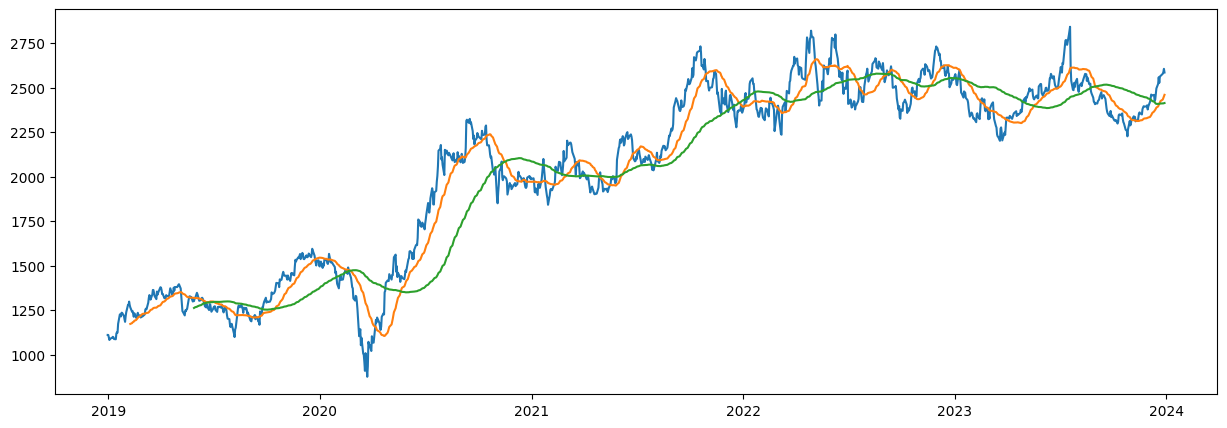

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df_ma['Close'])
plt.plot(df_ma['30day ma'])
plt.plot(df_ma['100day ma'])

In [17]:
df.reset_index(inplace=True)

In [18]:
df

,Date,Open,High,Low,Close,Volume
0,2018-12-31,1120.330444,1123.203125,1105.718872,1110.721436,7291282
1,2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,4498087
2,2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,7212697
3,2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,7517041
4,2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,8545382
...,...,...,...,...,...,...
1231,2023-12-22,2559.600098,2580.899902,2547.649902,2565.050049,8270892
1232,2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,3732832
1233,2023-12-27,2582.000000,2599.899902,2573.100098,2586.850098,4602078
1234,2023-12-28,2589.800049,2612.000000,2586.850098,2605.550049,6151318


In [19]:
train_size=int(len(df)*0.86)
train,test=df.iloc[:train_size,4:5],df.iloc[train_size:len(df),4:5]

In [20]:
test.shape

(174, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [22]:
train.shape

(1062, 1)

In [23]:
import numpy as np
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step = 13
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [25]:
pd.DataFrame(X_train).head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.120864,0.120737,0.113298,0.106342,0.109349,0.112457,0.112406,0.115514,0.113858,0.109043,0.108406,0.125145,0.128329
1,0.120737,0.113298,0.106342,0.109349,0.112457,0.112406,0.115514,0.113858,0.109043,0.108406,0.125145,0.128329,0.127590
2,0.113298,0.106342,0.109349,0.112457,0.112406,0.115514,0.113858,0.109043,0.108406,0.125145,0.128329,0.127590,0.153017
3,0.106342,0.109349,0.112457,0.112406,0.115514,0.113858,0.109043,0.108406,0.125145,0.128329,0.127590,0.153017,0.180201
4,0.109349,0.112457,0.112406,0.115514,0.113858,0.109043,0.108406,0.125145,0.128329,0.127590,0.153017,0.180201,0.178902
5,0.112457,0.112406,0.115514,0.113858,0.109043,0.108406,0.125145,0.128329,0.127590,0.153017,0.180201,0.178902,0.174392
6,0.112406,0.115514,0.113858,0.109043,0.108406,0.125145,0.128329,0.127590,0.153017,0.180201,0.178902,0.174392,0.185169
7,0.115514,0.113858,0.109043,0.108406,0.125145,0.128329,0.127590,0.153017,0.180201,0.178902,0.174392,0.185169,0.184430
8,0.113858,0.109043,0.108406,0.125145,0.128329,0.127590,0.153017,0.180201,0.178902,0.174392,0.185169,0.184430,0.176048
9,0.109043,0.108406,0.125145,0.128329,0.127590,0.153017,0.180201,0.178902,0.174392,0.185169,0.184430,0.176048,0.166418


In [26]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [27]:
ypred=svr.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
print('mse = ',mean_squared_error(y_test,ypred))
print('mae = ',mean_absolute_error(y_test,ypred))

mse =  0.0009871613573582158
mae =  0.023083554788746036


In [29]:
print('test data variance explained variance regression score',explained_variance_score(y_test,ypred))

test data variance explained variance regression score 0.7418105662176953


In [30]:
print('r2score = ',r2_score(y_test,ypred))

r2score =  0.7182680838777661


In [31]:
d=pd.DataFrame(y_test,ypred).reset_index()

In [32]:
d.rename(columns={0:'ypred'},inplace=True)

<Axes: >

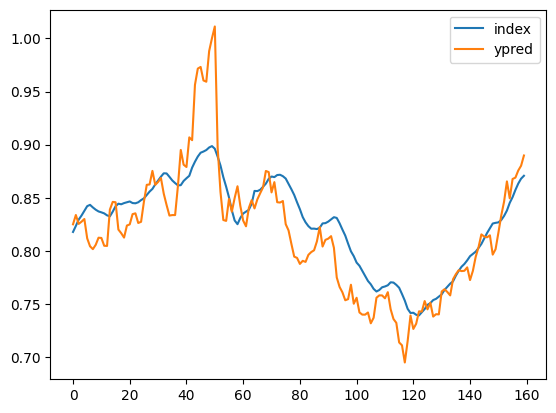

In [33]:
d.plot()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
ypred=regressor.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
print('mse = ',mean_squared_error(y_test,ypred))
print('mae = ',mean_absolute_error(y_test,ypred))
print('test data variance explained variance regression score',explained_variance_score(y_test,ypred))
print('r2score = ',r2_score(y_test,ypred))

mse =  0.0002910114618753028
mae =  0.012797457773598758
test data variance explained variance regression score 0.9169975109199032
r2score =  0.9169464888829614


<Axes: >

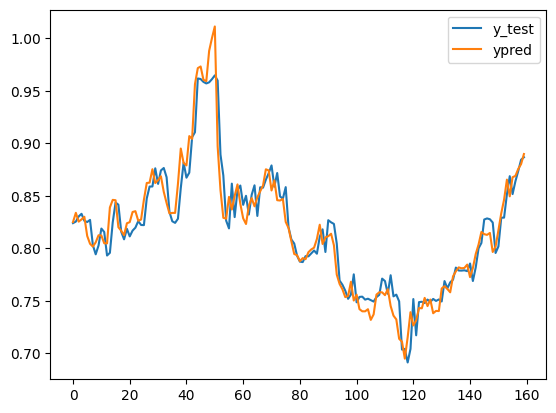

In [38]:
d=pd.DataFrame(y_test,ypred).reset_index()
d.rename(columns={'index':'y_test',0:'ypred'},inplace=True)
d.plot()

In [39]:
from sklearn import neighbors
knn=neighbors.KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=13)

In [40]:
ypred=knn.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
print('mse = ',mean_squared_error(y_test,ypred))
print('mae = ',mean_absolute_error(y_test,ypred))
print('test data variance explained variance regression score',explained_variance_score(y_test,ypred))
print('r2score = ',r2_score(y_test,ypred))

mse =  0.0006282710757490536
mae =  0.019805509752433385
test data variance explained variance regression score 0.8213733340393204
r2score =  0.8206939395514368


<Axes: >

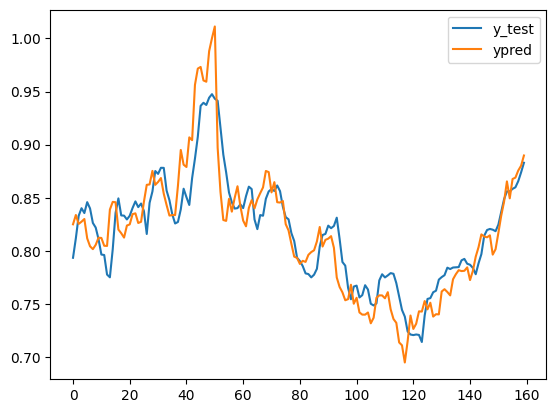

In [41]:
d=pd.DataFrame(y_test,ypred).reset_index()
d.rename(columns={'index':'y_test',0:'ypred'},inplace=True)
d.plot()

In [42]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential
import numpy as np
xtr = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
xte = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
xtr.shape

(1048, 13, 1)

In [43]:
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(13,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.fit(xtr,y_train,validation_data=(xte,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
33/33 [==============================] - 9s 63ms/step - loss: 0.0876 - val_loss: 0.0104
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 5/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 6/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 8/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 9/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 10/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0018

In [45]:
ypred=model.predict(xte)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
print('mse = ',mean_squared_error(y_test,ypred))
print('mae = ',mean_absolute_error(y_test,ypred))
print('test data variance explained variance regression score',explained_variance_score(y_test,ypred))
print('r2score = ',r2_score(y_test,ypred))

5/5 [==============================] - 1s 7ms/step
mse =  0.000530614559829012
mae =  0.018631302638337476
test data variance explained variance regression score 0.9186949877418333
r2score =  0.8485647198923563


<Axes: >

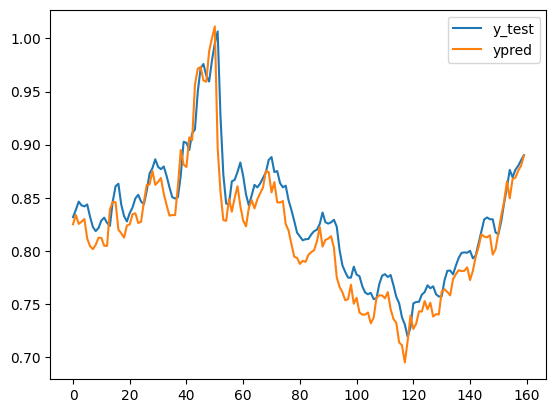

In [46]:
d=pd.DataFrame(y_test,ypred.reshape(-1)).reset_index()
d.rename(columns={'index':'y_test',0:'ypred'},inplace=True)
d.plot()

In [47]:
from tensorflow.keras.layers import GRU
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(13,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16065 (62.75 KB)
Trainable params: 16065 (62.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.fit(xtr,y_train,validation_data=(xte,y_test),epochs=25,batch_size=32,verbose=1)

Epoch 1/25
33/33 [==============================] - 9s 60ms/step - loss: 0.0779 - val_loss: 0.0125
Epoch 2/25
33/33 [==============================] - 1s 25ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 3/25
33/33 [==============================] - 1s 23ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/25
33/33 [==============================] - 1s 22ms/step - loss: 0.0012 - val_loss: 9.8675e-04
Epoch 5/25
33/33 [==============================] - 1s 23ms/step - loss: 0.0012 - val_loss: 9.9358e-04
Epoch 6/25
33/33 [==============================] - 1s 22ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/25
33/33 [==============================] - 1s 22ms/step - loss: 0.0012 - val_loss: 8.9106e-04
Epoch 8/25
33/33 [==============================] - 1s 22ms/step - loss: 0.0011 - val_loss: 8.6071e-04
Epoch 9/25
33/33 [==============================] - 1s 22ms/step - loss: 0.0011 - val_loss: 8.2550e-04
Epoch 10/25
33/33 [==============================] - 1s 22ms/step - loss: 0.0010 - val_lo

In [49]:
ypred=model.predict(xte)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
print('mse = ',mean_squared_error(y_test,ypred))
print('mae = ',mean_absolute_error(y_test,ypred))
print('test data variance explained variance regression score',explained_variance_score(y_test,ypred))
print('r2score = ',r2_score(y_test,ypred))

5/5 [==============================] - 1s 6ms/step
mse =  0.0005173705498078736
mae =  0.016075982814489027
test data variance explained variance regression score 0.8705116207692458
r2score =  0.8523445075558267


<Axes: >

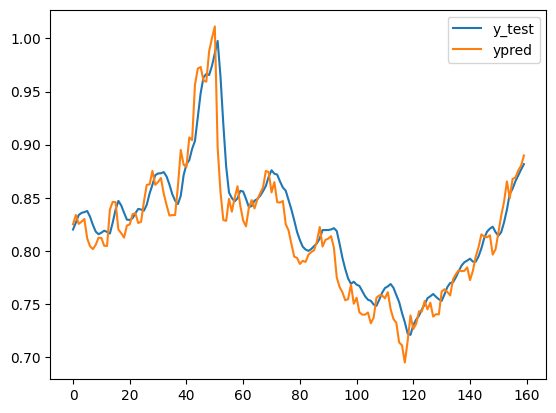

In [50]:
d=pd.DataFrame(y_test,ypred.reshape(-1)).reset_index()
d.rename(columns={'index':'y_test',0:'ypred'},inplace=True)
d.plot()